### This notebook is for practicing creating ADSL from SDTMs using Python.

In [16]:
#Read data
import pandas as pd

dm=pd.read_sas("dm.xpt", format="xport")
ex=pd.read_sas("ex.xpt", format="xport")


# Convert byte strings to regular strings
dataframes = [dm, ex]

for df in dataframes:
  for col in df.columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


# TRTSDT and TRTEDT
ex['exstdtc_dt'] = pd.to_datetime(ex['EXSTDTC'], errors='coerce')
ex['exendtc_dt'] = pd.to_datetime(ex['EXENDTC'], errors='coerce')

trt_dates = ex.groupby('USUBJID').agg(TRTSDT=('exstdtc_dt','min'),
                                      TRTEDT= ('exendtc_dt','max')).reset_index()

# Merge to DM
adsl_ = pd.merge(dm, trt_dates, on="USUBJID", how="left")

#TRT01P/TRT01A
adsl_ = adsl_.rename(columns={'ARM': 'TRT01P',
                              'ACTARM': 'TRT01A'})

#AGEGRP1
adsl_['AGEGRP1'] = pd.cut(adsl_['AGE'],
                          bins = [0, 65, 75, 100],
                          labels = ['<64', '65-74', '75+'])

print(adsl_)

# Final ADSL
adsl_vars = ['STUDYID', 'USUBJID', 'SUBJID', 'AGEU', 'AGE', 'AGEGRP1', 'SEX', 'RACE','TRTSDT','TRTEDT', 'TRT01P', 'TRT01A']
ADSL = adsl_[adsl_vars]

#print(adsl.head())


          STUDYID DOMAIN      USUBJID SUBJID     RFSTDTC     RFENDTC  \
0    CDISCPILOT01     DM  01-701-1015   1015  2014-01-02  2014-07-02   
1    CDISCPILOT01     DM  01-701-1023   1023  2012-08-05  2012-09-02   
2    CDISCPILOT01     DM  01-701-1028   1028  2013-07-19  2014-01-14   
3    CDISCPILOT01     DM  01-701-1033   1033  2014-03-18  2014-04-14   
4    CDISCPILOT01     DM  01-701-1034   1034  2014-07-01  2014-12-30   
..            ...    ...          ...    ...         ...         ...   
301  CDISCPILOT01     DM  01-718-1254   1254  2013-07-10  2014-01-09   
302  CDISCPILOT01     DM  01-718-1328   1328  2013-02-01  2013-05-01   
303  CDISCPILOT01     DM  01-718-1355   1355  2013-02-28  2013-08-29   
304  CDISCPILOT01     DM  01-718-1371   1371  2013-04-26  2013-08-08   
305  CDISCPILOT01     DM  01-718-1427   1427  2012-12-17  2013-02-18   

       RFXSTDTC    RFXENDTC RFICDTC          RFPENDTC  ...   ARMCD  \
0    2014-01-02  2014-07-02          2014-07-02T11:45  ...     Pb

### Data checks

['<64', '65-74', '75+']
Categories (3, object): ['<64' < '65-74' < '75+']
['WHITE' 'AMERICAN INDIAN OR ALASKA NATIVE' 'BLACK OR AFRICAN AMERICAN'
 'ASIAN']
count    306.000000
mean      75.088235
std        8.493511
min       50.000000
25%       70.250000
50%       77.000000
75%       81.000000
max       89.000000
Name: AGE, dtype: float64


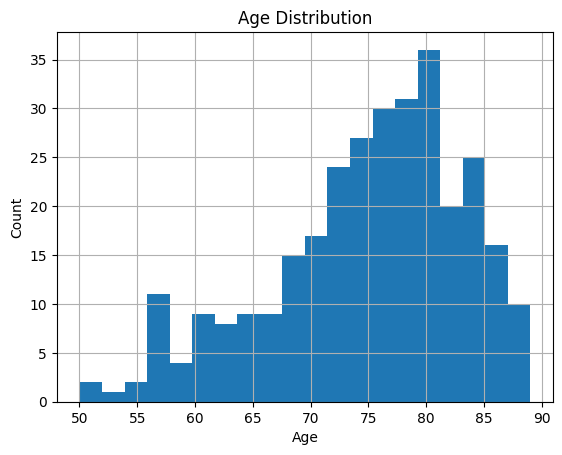

In [18]:
#Data checks
#To check Columns
#print(dm.columns)
#print(adsl.head())
#list(dm.columns)
#ex.describe()

# Data types
#print(adsl.dtypes)

# Check missing values
#print(adsl.isnull().sum())

# Check unique values
print(adsl['AGEGRP1'].unique())
print(adsl['RACE'].unique())

# Check summary stats
#print(adsl.describe())

# Check value counts by categories
#print(adsl['AGEGRP1'].value_counts())

#Descriptive stat.
print(dm['AGE'].describe())

#histogram
import matplotlib.pyplot as plt

dm['AGE'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

